In [1]:
from test.test_maps import *

#draw_maps()

In [2]:
from test.test_sensor import *

In [3]:
map_n = 2

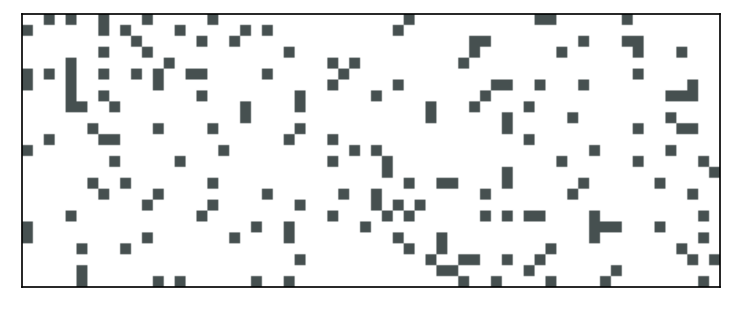

In [4]:
draw(sensor_maps[map_n])

In [5]:
from src.A_star_Replanning.a_star_replanning import *

In [6]:
f, p, open, closed = a_star_replanning(sensor_maps[map_n], (0,0), (23, 63))

In [7]:
f

True

In [8]:
len(p)

113

In [9]:
open.nodes_added

13010

In [10]:
closed.nodes_added

4500

In [11]:
from src.D_star_Lite.d_star_lite import *

In [12]:
f, p, open, closed = d_star_lite(sensor_maps[map_n], (0,0), (23, 63))

In [13]:
f

True

In [14]:
open.nodes_added

3151

In [15]:
closed.nodes_added

1467

In [16]:
len(p)

99

In [17]:
from src.LSS_LRTA_star.lss_lrta_star import *

In [18]:
f, p, open, closed = lss_lrta_star(sensor_maps[map_n], (0,0), (23, 63), lookahead=25)

In [19]:
f

True

In [20]:
open.nodes_added

10921

In [21]:
closed.nodes_added

1423

In [22]:
len(p)

93

# Эксперименты

In [23]:
from test.test_rnd import test_rnd
from src.A_star_Replanning.a_star_replanning import *
from src.D_star_Lite.d_star_lite import *

In [24]:
results_rnd_asr = test_rnd(a_star_replanning)

In [25]:
results_rnd_asr

{10: (3.4285999999999994, 1.6668999999999994),
 15: (3.929777777777778, 1.8791999999999986),
 20: (3.991550000000001, 1.8640749999999997),
 25: (4.411760000000001, 2.030064),
 30: (4.242855555555554, 1.9256333333333342),
 35: (4.421665306122451, 1.9937877551020413),
 40: (4.2138125, 1.9020062499999995)}

In [26]:
results_rnd_dsl = test_rnd(d_star_lite)

In [27]:
results_rnd_dsl

{10: (1.2566000000000004, 0.6378999999999998),
 15: (1.3668444444444443, 0.6928888888888888),
 20: (1.3130499999999998, 0.6454249999999999),
 25: (1.5352479999999995, 0.7558240000000002),
 30: (1.371322222222223, 0.6644555555555559),
 35: (1.4569959183673475, 0.7056979591836732),
 40: (1.4338687499999998, 0.6938875000000002)}

In [28]:
results_rnd_lssrta = test_rnd(lss_lrta_star)

In [29]:
results_rnd_lssrta

{10: (6.735999999999999, 1.0202000000000002),
 15: (8.14493333333333, 1.2158666666666664),
 20: (7.056875000000002, 1.0343),
 25: (7.9111839999999995, 1.12952),
 30: (6.54851111111111, 0.9236888888888889),
 35: (6.636400000000001, 0.9233795918367349),
 40: (6.270681249999999, 0.869225)}

In [30]:
import matplotlib.pyplot as plt
import numpy as np

In [31]:
vertex_acceses_rnd_asr = np.array(list(map(lambda x: x[0], results_rnd_asr.values())))-1
nodes_expanded_rnd_asr = np.array(list(map(lambda x: x[1], results_rnd_asr.values())))-1
vertex_acceses_rnd_dsl = np.array(list(map(lambda x: x[0], results_rnd_dsl.values())))-1
nodes_expanded_rnd_dsl = np.array(list(map(lambda x: x[1], results_rnd_dsl.values())))-1
vertex_acceses_rnd_lssrta = np.array(list(map(lambda x: x[0], results_rnd_lssrta.values())))-1
nodes_expanded_rnd_lssrta = np.array(list(map(lambda x: x[1], results_rnd_lssrta.values())))-1

In [32]:
vertex_acceses_rnd_asr[vertex_acceses_rnd_asr < 0] = 0.0
nodes_expanded_rnd_asr[nodes_expanded_rnd_asr < 0] = 0.0
vertex_acceses_rnd_dsl[vertex_acceses_rnd_dsl < 0] = 0.0
nodes_expanded_rnd_dsl[nodes_expanded_rnd_dsl < 0] = 0.0
vertex_acceses_rnd_lssrta[vertex_acceses_rnd_lssrta < 0] = 0.0
nodes_expanded_rnd_lssrta[nodes_expanded_rnd_lssrta < 0] = 0.0

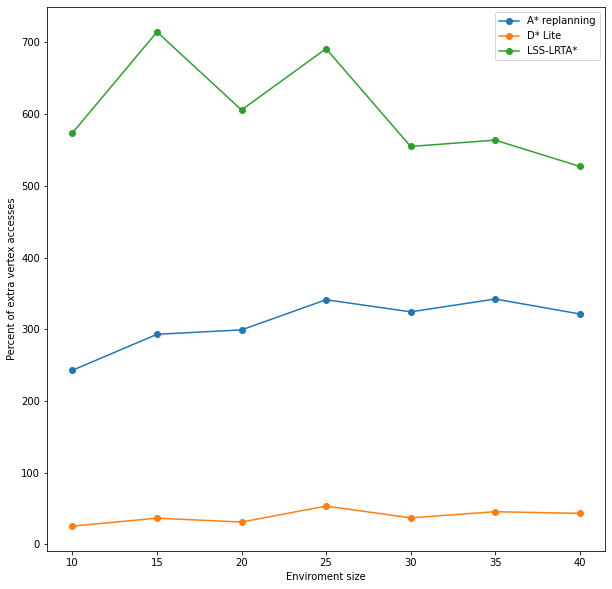

In [33]:
plt.figure(figsize=(10,10))
plt.plot(results_rnd_asr.keys(), vertex_acceses_rnd_asr*100, marker='o')
plt.plot(results_rnd_asr.keys(), vertex_acceses_rnd_dsl*100, marker='o')
plt.plot(results_rnd_lssrta.keys(), vertex_acceses_rnd_lssrta*100, marker='o')
plt.legend(['A* replanning', 'D* Lite', 'LSS-LRTA*'])
plt.xlabel('Enviroment size')
plt.ylabel('Percent of extra vertex accesses')
plt.show()

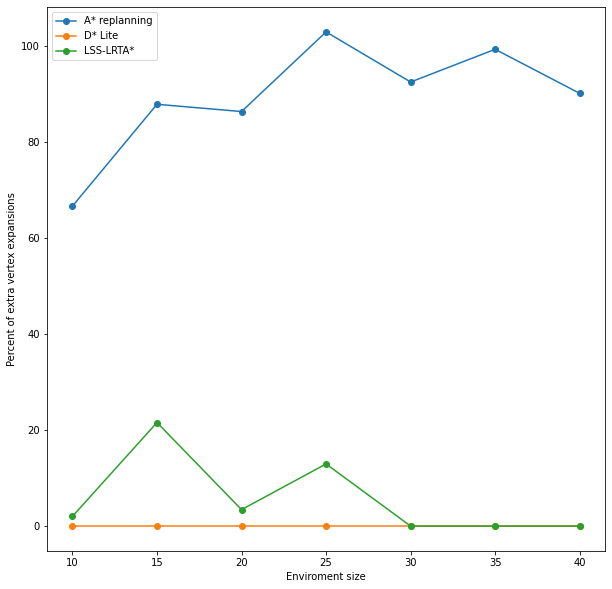

In [34]:
plt.figure(figsize=(10,10))
plt.plot(results_rnd_asr.keys(), nodes_expanded_rnd_asr*100, marker='o')
plt.plot(results_rnd_asr.keys(), nodes_expanded_rnd_dsl*100, marker='o')
plt.plot(results_rnd_lssrta.keys(), nodes_expanded_rnd_lssrta*100, marker='o')
plt.legend(['A* replanning', 'D* Lite', 'LSS-LRTA*'])
plt.xlabel('Enviroment size')
plt.ylabel('Percent of extra vertex expansions')
plt.show()

In [35]:
from test.test_sensor import *
from src.A_star_Replanning.a_star_replanning import *
from src.D_star_Lite.d_star_lite import *
import matplotlib.pyplot as plt
import numpy as np

In [36]:
results_sensor_asr = test_sensor(a_star_replanning)
results_sensor_asr

{1: (5.6270875, 2.74728125),
 5: (14.681687499999999, 7.212087499999999),
 10: (11.993562499999998, 5.973149999999999),
 15: (9.660818749999997, 4.928887499999998),
 20: (7.480518749999998, 3.825825000000001)}

In [37]:
results_sensor_dsl = test_sensor(a_star_replanning)
results_sensor_dsl

{1: (5.482062499999999, 2.8356125000000003),
 5: (4.078187499999999, 2.097831250000001),
 10: (3.0390875, 1.5676812499999995),
 15: (2.0473562500000004, 1.0601250000000002),
 20: (1.6706999999999999, 0.8646500000000005)}

In [38]:
results_sensor_lssrta = test_sensor(lss_lrta_star)
results_sensor_lssrta

{1: (5.109681250000001, 0.7453375),
 5: (4.392099999999998, 0.6470499999999998),
 10: (4.373737499999997, 0.6454187499999997),
 15: (4.315774999999998, 0.6367687499999998),
 20: (4.297893749999997, 0.6339124999999999)}

In [39]:
vertex_acceses_sensor_asr = np.array(list(map(lambda x: x[0], results_sensor_asr.values())))-1
nodes_expanded_sensor_asr = np.array(list(map(lambda x: x[1], results_sensor_asr.values())))-1
vertex_acceses_sensor_dsl = np.array(list(map(lambda x: x[0], results_sensor_dsl.values())))-1
nodes_expanded_sensor_dsl = np.array(list(map(lambda x: x[1], results_sensor_dsl.values())))-1
vertex_acceses_sensor_lssrta = np.array(list(map(lambda x: x[0], results_sensor_lssrta.values())))-1
nodes_expanded_sensor_lssrta = np.array(list(map(lambda x: x[1], results_sensor_lssrta.values())))-1

vertex_acceses_sensor_asr[vertex_acceses_sensor_asr < 0] = 0.0
nodes_expanded_sensor_asr[nodes_expanded_sensor_asr < 0] = 0.0
vertex_acceses_sensor_dsl[vertex_acceses_sensor_dsl < 0] = 0.0
nodes_expanded_sensor_dsl[nodes_expanded_sensor_dsl < 0] = 0.0
vertex_acceses_sensor_lssrta[vertex_acceses_sensor_lssrta < 0] = 0.0
nodes_expanded_sensor_lssrta[nodes_expanded_sensor_lssrta < 0] = 0.0

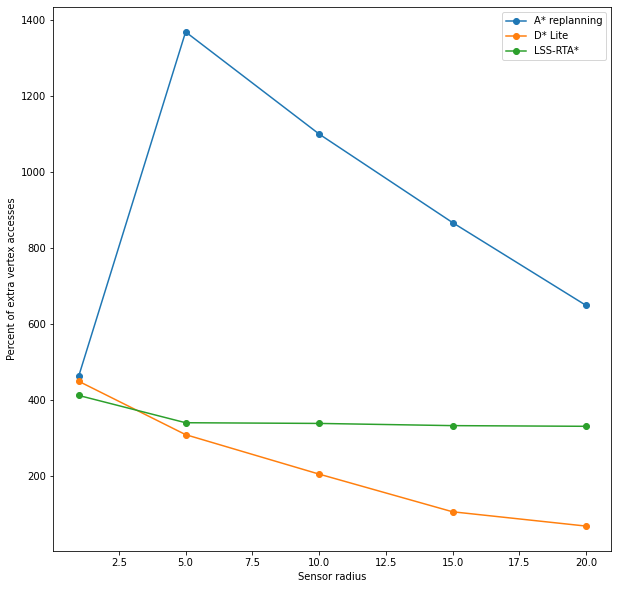

In [40]:
plt.figure(figsize=(10,10))
plt.plot(results_sensor_asr.keys(), vertex_acceses_sensor_asr*100, marker='o')
plt.plot(results_sensor_asr.keys(), vertex_acceses_sensor_dsl*100, marker='o')
plt.plot(results_sensor_asr.keys(), vertex_acceses_sensor_lssrta*100, marker='o')
plt.legend(['A* replanning', 'D* Lite', 'LSS-RTA*'])
plt.xlabel('Sensor radius')
plt.ylabel('Percent of extra vertex accesses')
plt.show()

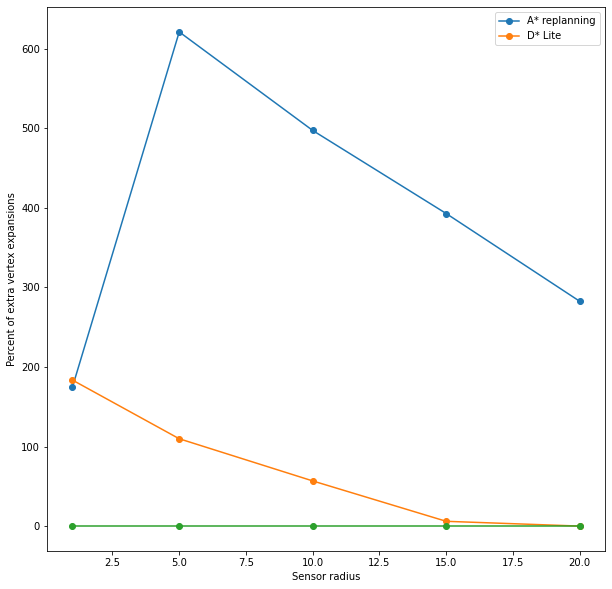

In [41]:
plt.figure(figsize=(10,10))
plt.plot(results_sensor_asr.keys(), nodes_expanded_sensor_asr*100, marker='o')
plt.plot(results_sensor_asr.keys(), nodes_expanded_sensor_dsl*100, marker='o')
plt.plot(results_sensor_asr.keys(), nodes_expanded_sensor_lssrta*100, marker='o')
plt.legend(['A* replanning', 'D* Lite'])
plt.xlabel('Sensor radius')
plt.ylabel('Percent of extra vertex expansions')
plt.show()